# Bayesian Networks Analysis

`Author: José Luis Maldonado Álvarez`

In [1]:
suppressWarnings(
    suppressPackageStartupMessages({
        library(bnlearn)
        library(Rgraphviz)
        library(gRain)
        library(dplyr)
        library(ggplot2)
        library(gridExtra)
        library(grid)
        library(repr)
    })
)

In [2]:
# Load the dataset
df <- read.csv('FINAL_DATASET.csv')

# Select the socioeconomic variables and the outcome variable and convert them to factors
data <- df %>% select(c(starts_with("SE_"), OUT_MACE)) %>% mutate(across(everything(), as.factor))

dim(data) # 16 predictors + 1 outcome variable
str(data)

[1] 2109   17

'data.frame':	2109 obs. of  17 variables:
 $ SE_MS   : Factor w/ 2 levels "1","2": 1 1 2 1 1 1 1 1 1 1 ...
 $ SE_SUP  : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ SE_RES  : Factor w/ 2 levels "1","2": 1 1 1 1 1 1 2 1 1 1 ...
 $ SE_STU  : Factor w/ 2 levels "1","2": 2 1 2 1 1 1 1 1 2 1 ...
 $ SE_OCC  : Factor w/ 2 levels "1","2": 2 1 2 1 1 1 1 2 2 1 ...
 $ SE_EX   : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 2 2 2 2 ...
 $ SE_HW   : Factor w/ 2 levels "0","1": 1 2 1 2 1 1 1 1 2 1 ...
 $ SE_PET  : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 1 1 1 2 ...
 $ SE_INT  : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ SE_TSI  : Factor w/ 2 levels "0","1": 2 1 1 2 1 1 1 2 2 2 ...
 $ SE_ACTT : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ SE_SH   : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ SE_TEH  : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ SE_CCH  : Factor w/ 2 levels "0","1": 2 2 2 2 1 1 2 2 2 2 ...
 $ SE_ENH  : Factor w/ 2 levels "0","1": 2 2 2 2

## Building BN with Hill-Climbing and Tabu algorithms

BIC score of the DAG learned with hill-climbing: -18724.23 
BIC score of the DAG learned with tabu search: -18724.23 


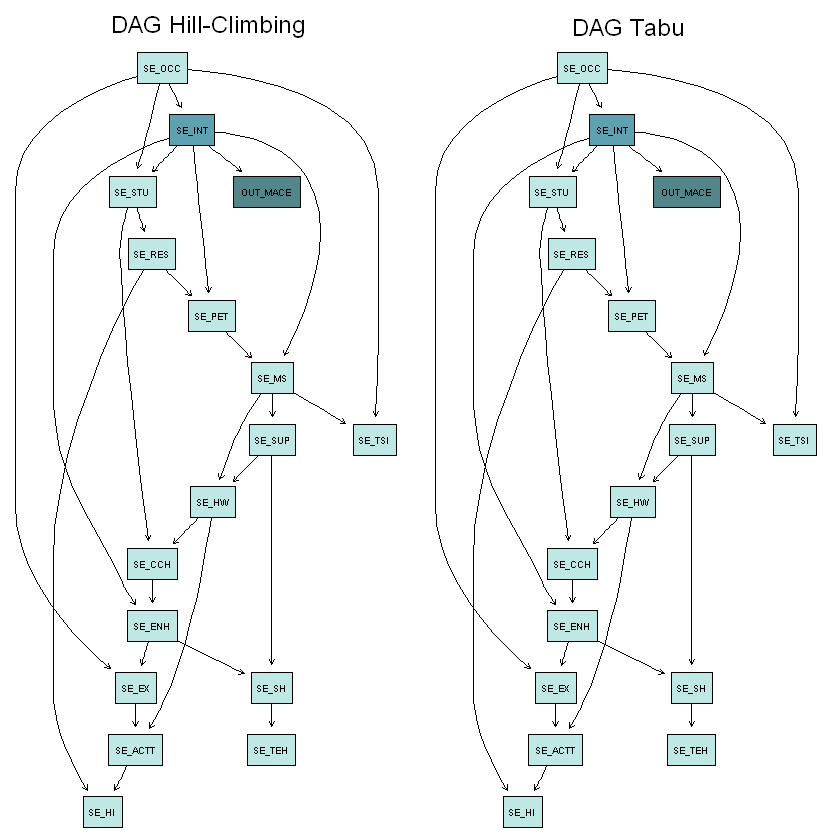

In [3]:
# Learn the DAG using the hill-climbing algorithm
dag_hc <- hc(data, score = "bic")
score_hc <- score(dag_hc, data = data, type = "bic")

# Learn the DAG using the tabu search algorithm
dag_tabu <- tabu(data, score = "bic")
score_tabu <- score(dag_tabu, data = data, type = "bic")

# Compare the scores
cat("BIC score of the DAG learned with hill-climbing:", score_hc, "\n")
cat("BIC score of the DAG learned with tabu search:", score_tabu, "\n")

# Plot the two DAGs for comparison
mb_hc <- mb(dag_hc, "OUT_MACE") # Markov blanket of OUT_MACE
mb_tabu <- mb(dag_tabu, "OUT_MACE") # Markov blanket of OUT_MACE

# Function to assign node colors
get_node_colors <- function(dag, mb_nodes) {
    colors <- rep("#BFE8E4", length(nodes(dag)))
    names(colors) <- nodes(dag)
    colors["OUT_MACE"] <- "#53868B"
    colors[mb_nodes] <- "#5EA1B0"
    return(colors)
}

node_colors_hc <- get_node_colors(dag_hc, mb_hc)
node_colors_tabu <- get_node_colors(dag_tabu, mb_tabu)

par(mfrow = c(1, 2), bg = "white")
g_hc <- graphviz.plot(dag_hc, main = "DAG Hill-Climbing", render = FALSE)
graph::nodeRenderInfo(g_hc)$fill <- node_colors_hc
Rgraphviz::renderGraph(g_hc)

g_tabu <- graphviz.plot(dag_tabu, main = "DAG Tabu", render = FALSE)
graph::nodeRenderInfo(g_tabu)$fill <- node_colors_tabu
Rgraphviz::renderGraph(g_tabu)

In [4]:
# Calculate the strength of the relationships between nodes for the restricted models
arc_strength_hc <- arc.strength(dag_hc, data = data, criterion = "x2")
arc_strength_tabu <- arc.strength(dag_tabu, data = data, criterion = "x2")

cat("\nStrength of the relationships (Hill-Climbing with restrictions):\n")
print(arc_strength_hc)

cat("\nStrength of the relationships (Tabu with restrictions):\n")
print(arc_strength_tabu)


Strength of the relationships (Hill-Climbing with restrictions):
      from       to     strength
1   SE_OCC   SE_INT 4.382453e-39
2   SE_INT   SE_STU 4.343418e-28
3    SE_MS    SE_HW 8.297635e-32
4    SE_EX  SE_ACTT 2.363184e-30
5   SE_RES    SE_HI 5.506649e-26
6    SE_MS   SE_SUP 3.441808e-24
7   SE_STU   SE_CCH 6.095607e-20
8   SE_CCH   SE_ENH 6.148273e-11
9   SE_RES   SE_PET 1.107825e-14
10  SE_OCC    SE_EX 9.358499e-15
11  SE_OCC   SE_STU 2.281733e-13
12  SE_STU   SE_RES 6.842506e-10
13  SE_INT OUT_MACE 3.423684e-09
14  SE_ENH    SE_SH 1.706718e-07
15   SE_SH   SE_TEH 4.682568e-16
16  SE_ENH    SE_EX 9.285278e-09
17  SE_INT   SE_ENH 8.678672e-09
18 SE_ACTT    SE_HI 7.145313e-10
19  SE_INT   SE_PET 4.872176e-08
20   SE_HW  SE_ACTT 4.483959e-08
21   SE_HW   SE_CCH 7.940739e-08
22  SE_PET    SE_MS 1.019153e-04
23  SE_SUP    SE_HW 7.205815e-05
24  SE_OCC   SE_TSI 3.458313e-06
25   SE_MS   SE_TSI 7.526604e-05
26  SE_SUP    SE_SH 2.941560e-08
27  SE_INT    SE_MS 3.374530e-04

Strength 

Bayesian Network fitted with Hill-Climbing DAG:
  Parameters of node OUT_MACE (multinomial distribution)

Conditional probability table:
 
        SE_INT
OUT_MACE         0         1
       0 0.7145833 0.8354819
       1 0.2854167 0.1645181
Number of parameters in the fitted model: 59 

Bayesian Network fitted with Tabu DAG:
  Parameters of node OUT_MACE (multinomial distribution)

Conditional probability table:
 
        SE_INT
OUT_MACE         0         1
       0 0.7145833 0.8354819
       1 0.2854167 0.1645181
Number of parameters in the fitted model: 59 


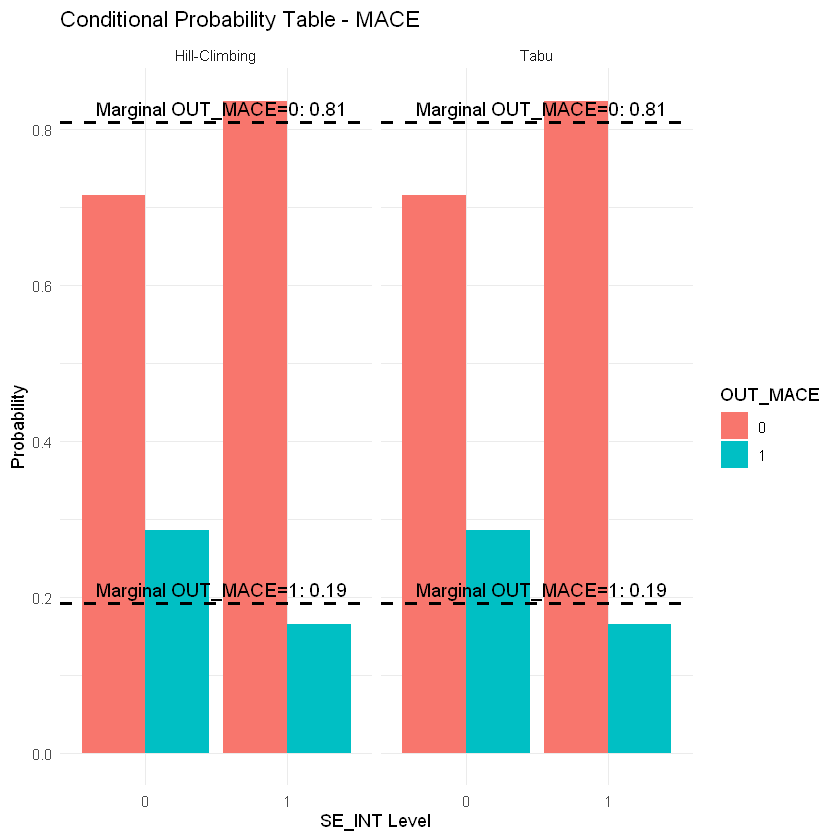

In [5]:
# Fit the Bayesian networks using the learned DAGs
set.seed(1) # For reproducibility

cat("Bayesian Network fitted with Hill-Climbing DAG:")
bn_hc <- bn.fit(dag_hc, data = data)
print(bn_hc$OUT_MACE)
cat("Number of parameters in the fitted model:", suppressWarnings(nparams(bn_hc)), "\n")
df_hc <- as.data.frame(as.table(coef(bn_hc$OUT_MACE)))
df_hc$Method <- "Hill-Climbing"

cat("\nBayesian Network fitted with Tabu DAG:")
bn_tabu <- bn.fit(dag_tabu, data = data)
print(bn_tabu$OUT_MACE)
cat("Number of parameters in the fitted model:", suppressWarnings(nparams(bn_tabu)), "\n")
df_tabu <- as.data.frame(as.table(coef(bn_tabu$OUT_MACE)))
df_tabu$Method <- "Tabu"

# Combine data for both plots
df_combined <- rbind(df_hc, df_tabu)

# Plot both in one using facets
# Calculate marginal probability of OUT_MACE = "1"
marginal_prob <- prop.table(table(data$OUT_MACE))

ggplot(df_combined, aes(x = SE_INT, y = Freq, fill = OUT_MACE)) +
        geom_bar(stat = "identity", position = "dodge") +
        facet_wrap(~Method) +
        labs(title = "Conditional Probability Table - MACE",
                 x = "SE_INT Level", y = "Probability") +
        theme_minimal() +
        geom_hline(yintercept = marginal_prob["1"], linetype = "dashed", color = "black", linewidth = 1) +
        annotate("text", x = Inf, y = marginal_prob["1"], label = sprintf("Marginal OUT_MACE=1: %.2f", marginal_prob["1"]),
                         vjust = -0.5, hjust = 1.1, color = "black", size = 4)+
        geom_hline(yintercept = marginal_prob["0"], linetype = "dashed", color = "black", linewidth = 1) +
        annotate("text", x = Inf, y = marginal_prob["0"], label = sprintf("Marginal OUT_MACE=0: %.2f", marginal_prob["0"]),
                         vjust = -0.5, hjust = 1.1, color = "black", size = 4)
        

In [6]:
# Perform inference using the bnlearn package
cat("\nInference using the bnlearn package with evidence SE_INT = 1:")
print(cpquery(bn_hc, event = (OUT_MACE == "1"), evidence = (SE_INT == "1")))

# Perform inference using the gRain package (exact inference)
bn_hc_grain <- compile(as.grain(bn_hc))
cat("Conditional probability of OUT_MACE given SE_INT = 1:\n")
print(querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_INT = "1"))$OUT_MACE)
cat("Conditional probability of OUT_MACE given SE_INT = 1 and SE_STU = 1:\n")
print(querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_INT = "1", SE_STU = "1"))$OUT_MACE)
cat("Conditional probability of OUT_MACE given SE_INT = 1 and SE_OCC = 1:\n")
print(querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_INT = "1", SE_OCC = "1"))$OUT_MACE)
cat("Conditional probability of OUT_MACE given SE_OCC = 1:\n")
print(querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_OCC = "1"))$OUT_MACE)
cat("Conditional probability of OUT_MACE given SE_STU = 1:\n")
print(querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_STU = "1"))$OUT_MACE)
cat("Conditional probability of OUT_MACE given SE_OCC = 1 and SE_STU = 1:\n")
print(querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_OCC = "1", SE_STU = "1"))$OUT_MACE)
cat("Conditional probability of OUT_MACE given SE_PET = 1:\n")
print(querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_PET = "1"))$OUT_MACE)


Inference using the bnlearn package with evidence SE_INT = 1:[1] 0.1643889
Conditional probability of OUT_MACE given SE_INT = 1:
OUT_MACE
        0         1 
0.8354819 0.1645181 
Conditional probability of OUT_MACE given SE_INT = 1 and SE_STU = 1:
OUT_MACE
        0         1 
0.8354819 0.1645181 
Conditional probability of OUT_MACE given SE_INT = 1 and SE_OCC = 1:
OUT_MACE
        0         1 
0.8354819 0.1645181 
Conditional probability of OUT_MACE given SE_OCC = 1:
OUT_MACE
        0         1 
0.7987358 0.2012642 
Conditional probability of OUT_MACE given SE_STU = 1:
OUT_MACE
        0         1 
0.7950824 0.2049176 
Conditional probability of OUT_MACE given SE_OCC = 1 and SE_STU = 1:
OUT_MACE
        0         1 
0.7876443 0.2123557 
Conditional probability of OUT_MACE given SE_PET = 1:
OUT_MACE
        0         1 
0.8156878 0.1843122 


Exact conditional probabilities of OUT_MACE = 1:
$`OUT_MACE|SE_INT=1`
        1 
0.1645181 

$`OUT_MACE|SE_STU=1`
        1 
0.2049176 

$`OUT_MACE|SE_OCC=1`
        1 
0.2012642 

$`OUT_MACE|SE_INT=1,SE_STU=1`
        1 
0.1645181 

$`OUT_MACE|SE_INT=1,SE_OCC=1`
        1 
0.1645181 

$`OUT_MACE|SE_OCC=1,SE_STU=1`
        1 
0.2123557 



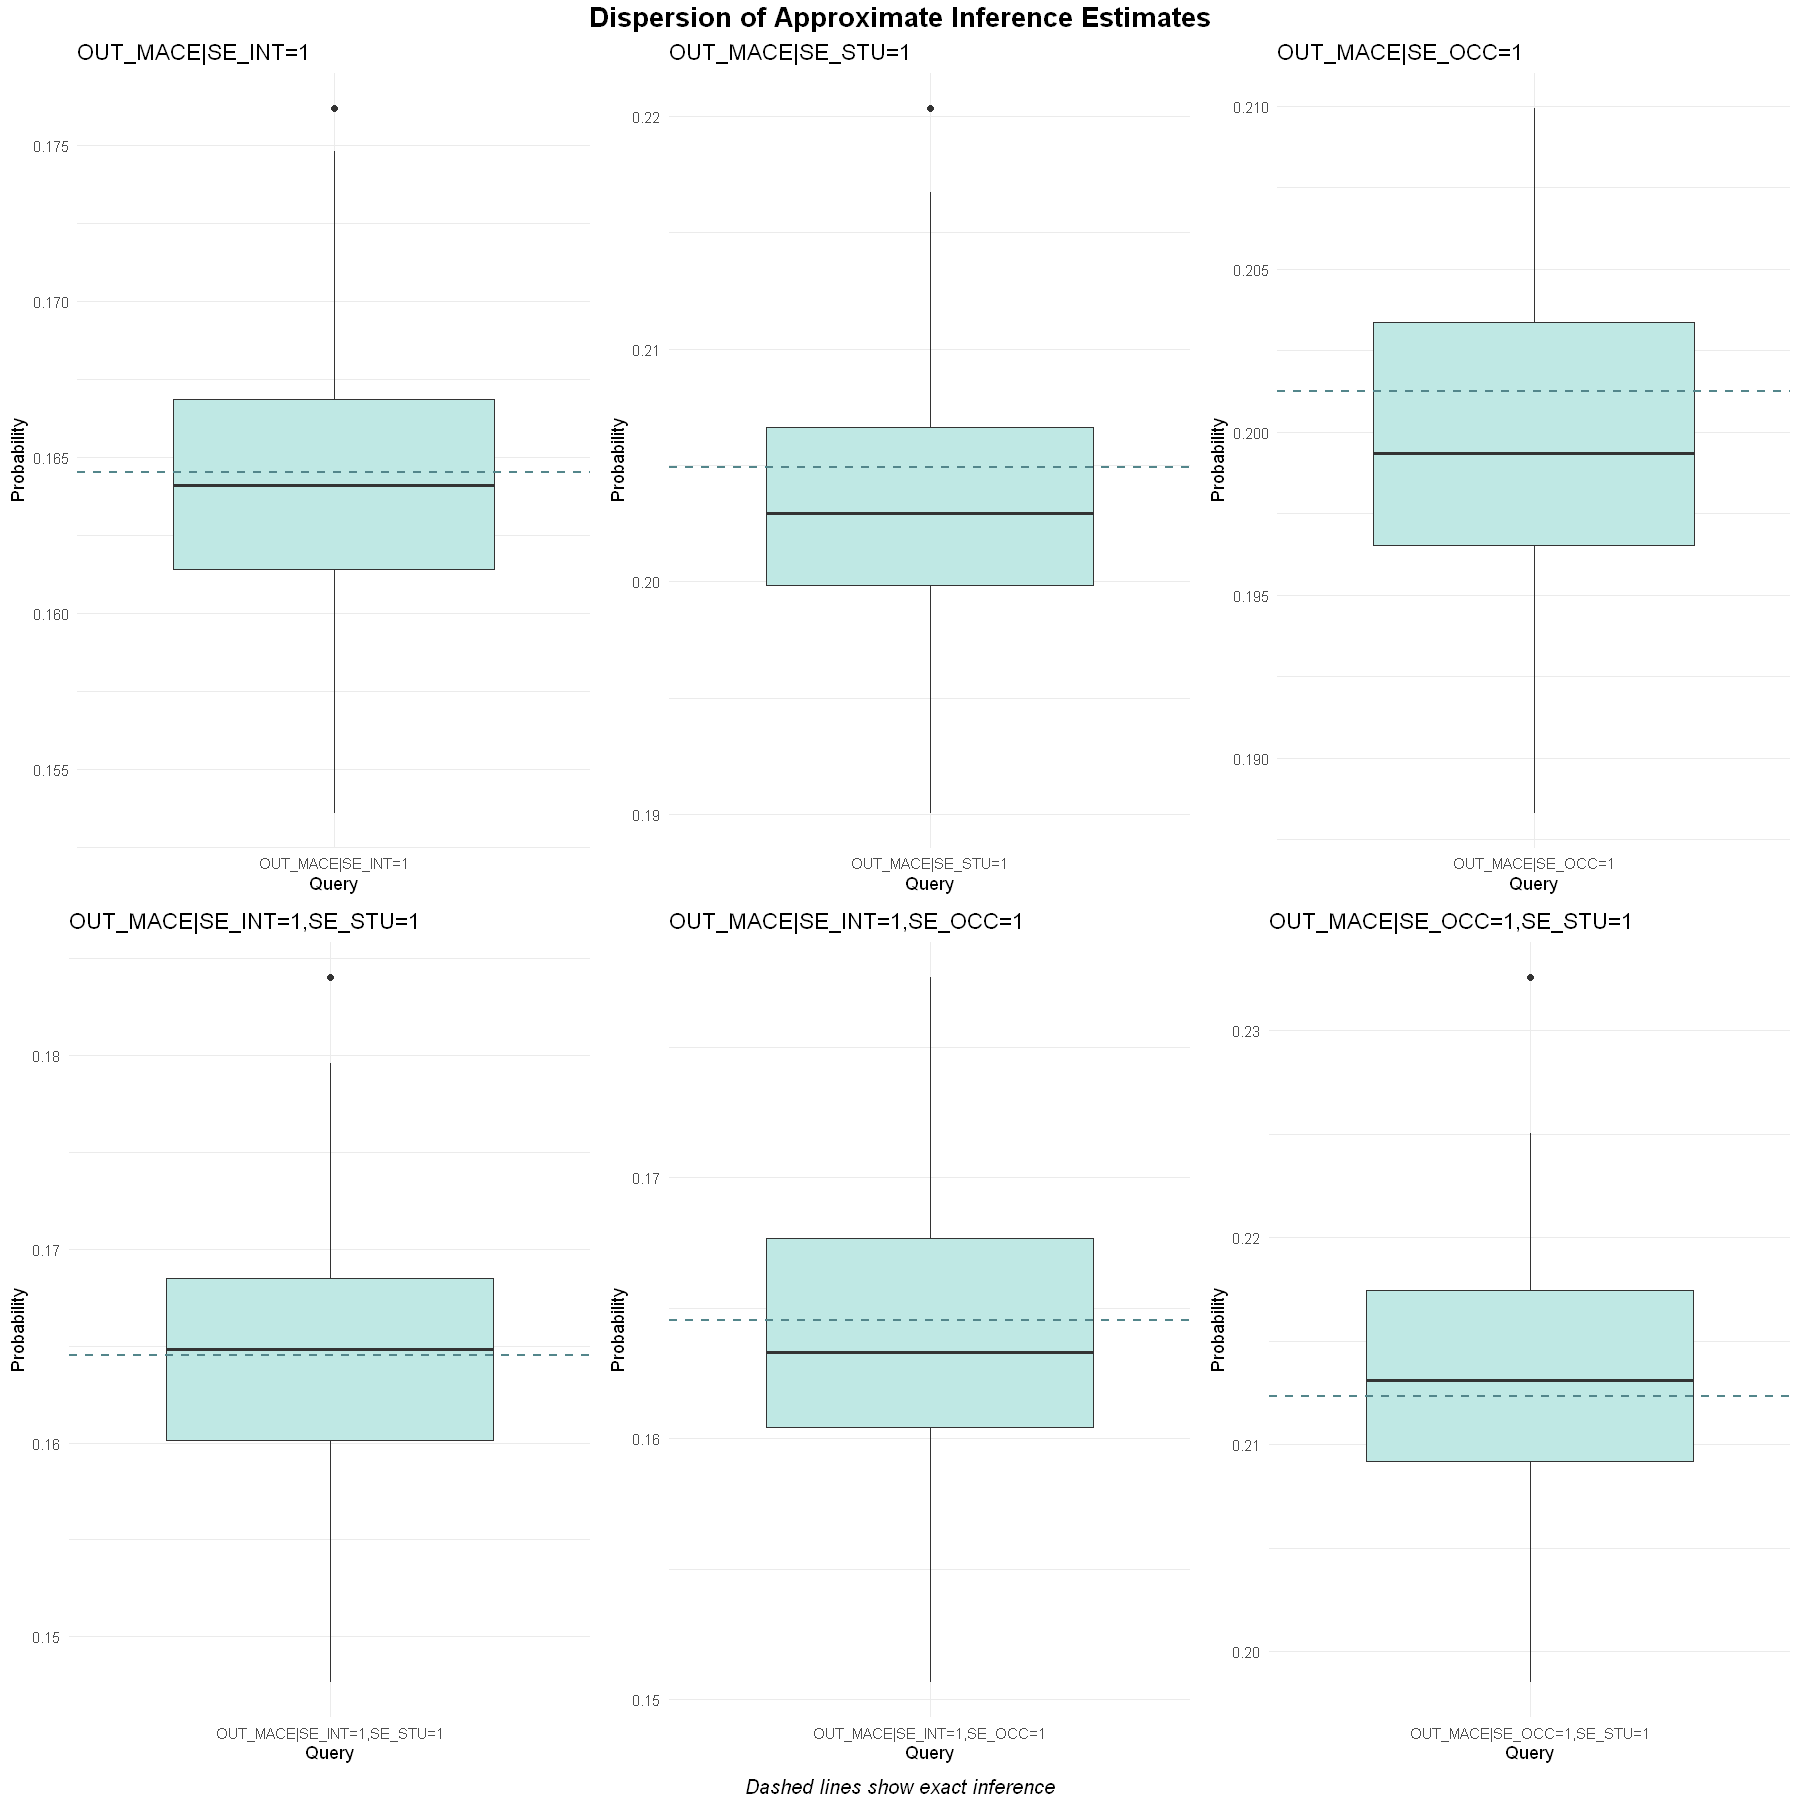

In [7]:
# Exact inference for the Bayesian network using the hill-climbing DAG
bn_hc_grain <- compile(as.grain(bn_hc))

# Store exact probabilities for each query in a named list
exact_probs <- list(
    "OUT_MACE|SE_INT=1" = querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_INT = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_STU=1" = querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_STU = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_OCC=1" = querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_OCC = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_INT=1,SE_STU=1" = querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_INT = "1", SE_STU = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_INT=1,SE_OCC=1" = querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_INT = "1", SE_OCC = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_OCC=1,SE_STU=1" = querygrain(bn_hc_grain, nodes = "OUT_MACE", evidence = list(SE_OCC = "1", SE_STU = "1"))$OUT_MACE["1"]
)

# Print all exact probabilities in a compact way
cat("Exact conditional probabilities of OUT_MACE = 1:\n")
print(exact_probs)

# Approximate inference using cpquery
set.seed(0)
approx_outmace_seint1 <- replicate(100, cpquery(bn_hc, event = (OUT_MACE == "1"), evidence = (SE_INT == "1")))
approx_outmace_sestu1 <- replicate(100, cpquery(bn_hc, event = (OUT_MACE == "1"), evidence = (SE_STU == "1")))
approx_outmace_seocc1 <- replicate(100, cpquery(bn_hc, event = (OUT_MACE == "1"), evidence = (SE_OCC == "1")))
approx_outmace_seint1_sestu1 <- replicate(100, cpquery(bn_hc, event = (OUT_MACE == "1"), evidence = ((SE_INT == "1") & (SE_STU == "1"))))
approx_outmace_seint1_seocc1 <- replicate(100, cpquery(bn_hc, event = (OUT_MACE == "1"), evidence = ((SE_INT == "1") & (SE_OCC == "1"))))
approx_outmace_seocc1_sestu1 <- replicate(100, cpquery(bn_hc, event = (OUT_MACE == "1"), evidence = ((SE_OCC == "1") & (SE_STU == "1"))))

# Combine results into a data frame for visualization
approx_results <- data.frame(
    Variable = rep(c(
        "OUT_MACE|SE_INT=1",
        "OUT_MACE|SE_STU=1",
        "OUT_MACE|SE_OCC=1",
        "OUT_MACE|SE_INT=1,SE_STU=1",
        "OUT_MACE|SE_INT=1,SE_OCC=1",
        "OUT_MACE|SE_OCC=1,SE_STU=1"
    ), each = 100),
    Probability = c(
        approx_outmace_seint1,
        approx_outmace_sestu1,
        approx_outmace_seocc1,
        approx_outmace_seint1_sestu1,
        approx_outmace_seint1_seocc1,
        approx_outmace_seocc1_sestu1
    )
)

options(repr.plot.width = 15, repr.plot.height = 15)

# Create boxplots for each query, add exact inference line
plots <- lapply(unique(approx_results$Variable), function(var) {
    ggplot(subset(approx_results, Variable == var), aes(x = Variable, y = Probability)) +
        geom_boxplot(fill = "#BFE8E4") +
        geom_hline(yintercept = exact_probs[[var]], linetype = "dashed", color = "#53868B", lwd = 0.75) +
        labs(x = "Query", y = "Probability", title = var) +
        theme_minimal()
})

# Arrange plots in a grid with bold and centered title
grid.arrange(
    grobs = plots,
    ncol = 3,
    top = textGrob("Dispersion of Approximate Inference Estimates", gp = gpar(fontsize = 16, fontface = "bold"), just = "center", hjust = 0.5),
    bottom = textGrob("Dashed lines show exact inference", gp = gpar(fontsize = 12, fontface = "italic"))
)

In [8]:
options(repr.plot.width = NULL, repr.plot.height = NULL) # Reset plot dimensions

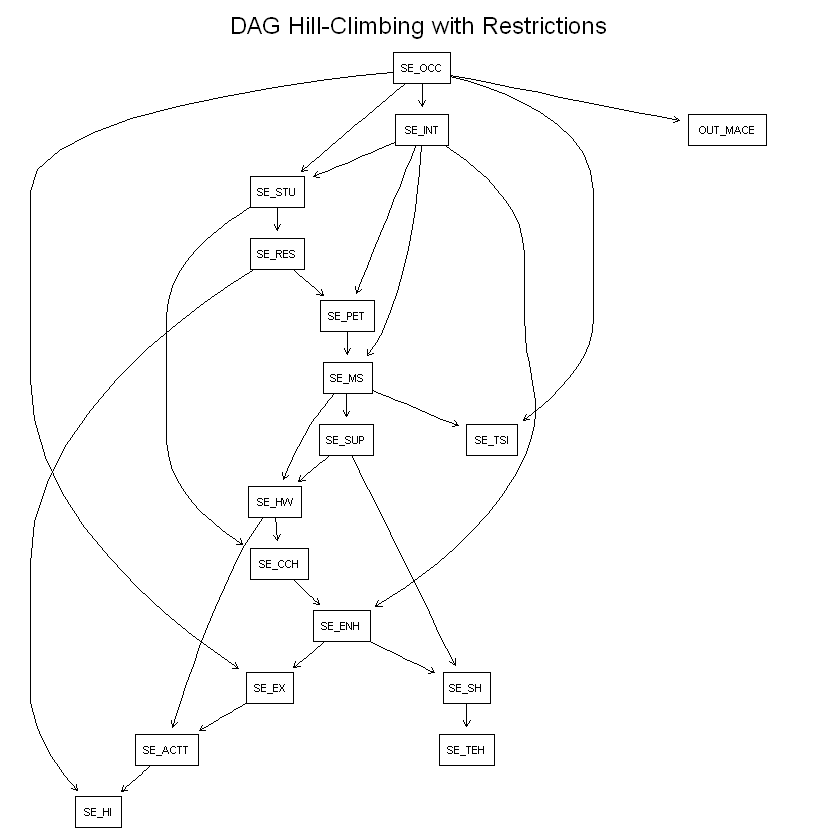

In [9]:
# Learn DAG with restrictions
dag_hc2 <- hc(data, score = "bic", blacklist = matrix(c("SE_INT","OUT_MACE","OUT_MACE","SE_INT"), ncol = 2, byrow = TRUE))
score_hc <- score(dag_hc2, data = data, type = "bic")
par(bg = "white")
graphviz.plot(dag_hc2, main = "DAG Hill-Climbing with Restrictions")

## Bootstrap BN creation 

In [10]:
# Function to color the nodes
color_nodes <- function(nodes, mmarkov, target) {
    sapply(nodes, function(node) {
        if (node %in% mmarkov) {
            "#5EA1B0"
        } else if (node == target) {
            "#53868B"
        } else if (startsWith(node, "SE")) {
            "#BFE8E4"
        } else {
            "white"
        }
    })
}

# Function to draw the final DAG and show the strength of the arcs
draw_final_dag <- function(arcs, nodes, mmarkov, target, data, size){
    arcs <- unique(arcs)
    dag <- empty.graph(nodes)
    arcs(dag) <- arcs
    g <- graphviz.plot(dag, render = FALSE)
    attrs <- list(node = list(shape = "ellipse", fontsize = 30, fillcolor = "lightgrey", style = "filled"),
                  edge = list(arrowsize = 1), graph = list(bgcolor = "white"))
    graph::graphRenderInfo(g) <- attrs
    colors <- color_nodes(nodes, mmarkov, target)
    graph::nodeRenderInfo(g)$fill <- colors
    graph::nodeRenderInfo(g)$col <- "black"
    graph::nodeRenderInfo(g)$textCol <- "black"
    graph::nodeRenderInfo(g)$fontsize <- 30
    variables <- intersect(names(data), nodes)
    data <- data[, variables, drop = FALSE]
    arc_strengths <- suppressWarnings(arc.strength(dag, data = data, criterion = "bic"))
    arc_strengths <- arc_strengths[order(-arc_strengths$strength), ]
    arc_strengths$abs_strength <- abs(as.numeric(sub(".*?(-?\\d+).*", "\\1", as.character(arc_strengths$strength))))
    arc_strengths$width <- cut(arc_strengths$abs_strength, breaks = c(-Inf, 10, 20, 50, 100, 200, Inf), labels = c(1, 2, 3, 4, 5, 6))
    edge_weights <- setNames(as.numeric(arc_strengths$width), paste(arc_strengths$from, arc_strengths$to, sep = "~"))
    edgeRenderInfo(g)$lwd <- edge_weights
    edgeRenderInfo(g)$col <- "black"
    cat("Final arcs ordered by strength:\n")
    print(arc_strengths[, c("from", "to", "strength", "abs_strength", "width")])
    Rgraphviz::renderGraph(g)
}

# Bootstrap funtion for the DAG (using 100 iterations by default)
create_dag_bootstrap <- function(data, target, n_iter = 100, seed = 1){
    set.seed(seed)
    results <- list()
    for (i in 1:n_iter) {
        sample <- data[sample(nrow(data), replace = TRUE), ]
        structure <- hc(sample) # Create the structure of the Bayesian Network using hc
        arcs <- arcs(structure)
        nodes <- nodes(structure)
        mmarkov <- mb(structure, node = target)
        results[[i]] <- list(structure = structure, arcs = arcs, nodes = nodes, mmarkov = mmarkov)
    }
    return(results)
}

# Function to calculate the frequency of each arcs
calculate_arc_frequency <- function(results){
    arcs_list <- lapply(results, function(res) {
        arcs <- res$arcs
        data.frame(from = arcs[, 1], to = arcs[, 2])
    })
    combined_arcs <- do.call(rbind, arcs_list)
    arcs_table <- as.data.frame(table(paste(combined_arcs$from, combined_arcs$to, sep = "~")))
    arcs_table <- arcs_table[order(-arcs_table$Freq), ]
    separated_arcs <- as.data.frame(do.call(rbind, strsplit(as.character(arcs_table$Var1), "~")))
    colnames(separated_arcs) <- c("from", "to")
    arcs_table <- cbind(separated_arcs, arcs_table$Freq)
    colnames(arcs_table) <- c("from", "to", "Freq")
    return(arcs_table)
}

# Function to check if an arc exists in the graph (useful to avoid some arcs)
arc_exists <- function(graph, from, to) {
    present_arc <- arcs(graph)
    return(any(present_arc[, 1] == from & present_arc[, 2] == to) ||
                 any(present_arc[, 1] == to & present_arc[, 2] == from))
}

# Function to create the final network
create_final_network <- function(arc_frequency, threshold = 50) {
    filtered_arcs <- arc_frequency %>% filter(Freq >= threshold)
    nodes <- unique(c(filtered_arcs$from, filtered_arcs$to))
    final_network <- empty.graph(nodes)
    for (i in 1:nrow(filtered_arcs)) {
        from <- as.character(filtered_arcs$from[i])
        to <- as.character(filtered_arcs$to[i])
        if (!is.null(from) && !is.null(to) && !arc_exists(final_network, from, to)) {
            if (to != "MH_AGE" && to != "MH_SEX") {
                try(final_network <- set.arc(final_network, from, to), silent = TRUE)
            }
        }
    }
    return(final_network)
}

# MAIN FUNCTION
perform_analysis <- function(data, target, n_iter = 100, threshold = 40, seed = 1){
    bootstrap_results <- create_dag_bootstrap(data, target, n_iter, seed)
    arc_frequency <- calculate_arc_frequency(bootstrap_results)
    cat("Frecuency of arcs in the bootstrap samples:\n")
    print(arc_frequency)
    BNet <- create_final_network(arc_frequency, threshold)
    cat("\nFinal Bayesian Network structure:\n")
    print(BNet)
    network_variables <- nodes(BNet)
    final_data <- data[, network_variables, drop = FALSE]
    bn_fitted <- bn.fit(BNet, data = final_data, method = "bayes")
    cat("Number of parameters in the final model:", suppressWarnings(nparams(bn_fitted)),"\n")
    draw_final_dag(arcs(BNet), nodes(BNet), mb(BNet, target), target, final_data, size = 15)
    grain_network <- as.grain(bn_fitted) # Convert to gRain network for queries
    junction <- compile(grain_network)
    
    # Create bar chart for the target variable using bn.fit.barchart
    bn.fit.barchart(bn_fitted[[target]])
    
    return(list(BNet = BNet, bn_fitted = bn_fitted, final_data = final_data, junction = junction))
}

Frecuency of arcs in the bootstrap samples:
        from       to Freq
1      SE_EX  SE_ACTT   99
2      SE_MS   SE_SUP   99
3      SE_SH   SE_TEH   98
4     SE_RES    SE_HI   97
5     SE_STU   SE_CCH   97
6     SE_INT OUT_MACE   95
7    SE_ACTT    SE_HI   94
8     SE_OCC    SE_EX   90
9      SE_MS    SE_HW   88
10    SE_INT   SE_ENH   87
11    SE_CCH   SE_ENH   79
12     SE_HW  SE_ACTT   79
13    SE_ENH    SE_SH   78
14    SE_RES   SE_PET   78
15    SE_ENH    SE_EX   76
16    SE_OCC   SE_INT   70
17    SE_OCC   SE_STU   65
18    SE_INT   SE_STU   56
19    SE_PET    SE_MS   53
20    SE_SUP    SE_SH   52
21    SE_INT   SE_CCH   50
22    SE_OCC   SE_TSI   49
23     SE_HW   SE_SUP   48
24    SE_RES   SE_STU   47
25    SE_STU   SE_RES   45
26    SE_CCH    SE_SH   44
27    SE_INT    SE_MS   44
28    SE_STU   SE_INT   44
29     SE_HW   SE_CCH   43
30    SE_SUP    SE_HW   42
31    SE_PET   SE_INT   38
32    SE_STU   SE_OCC   35
33    SE_CCH    SE_HW   31
34    SE_ENH   SE_TSI   31
35    SE_PE

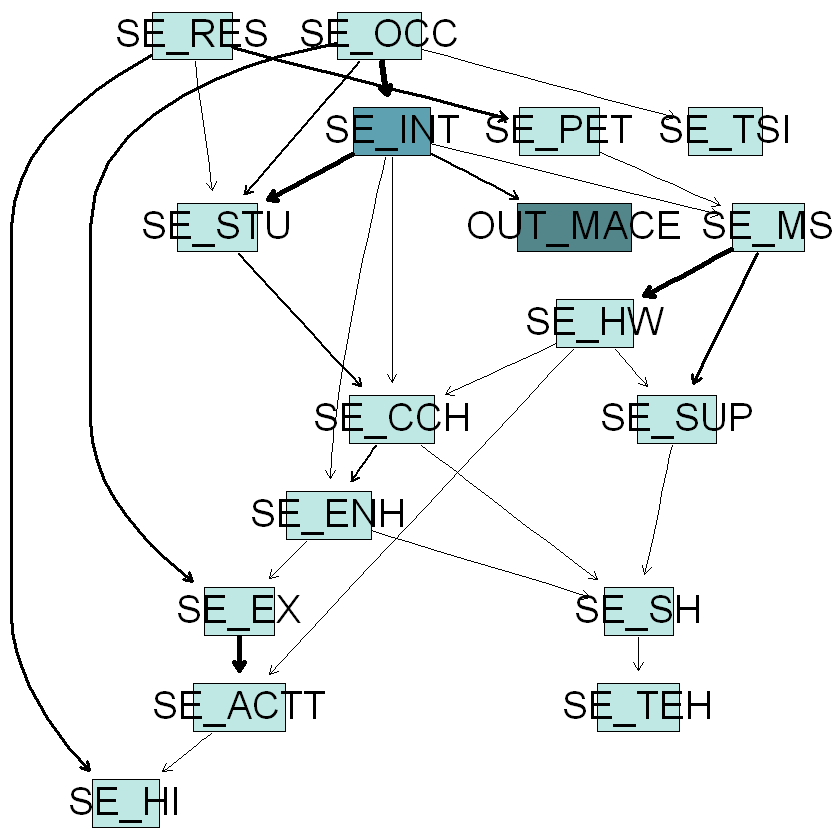

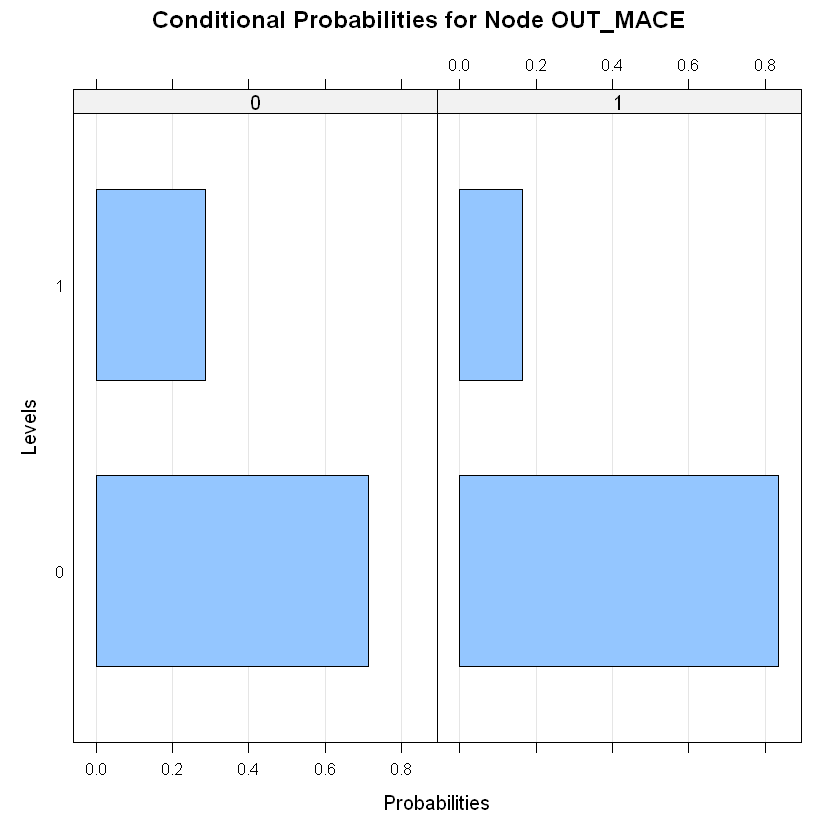

In [11]:
par(bg = "white")
bn_final <- perform_analysis(data, "OUT_MACE", n_iter = 100, threshold = 40, seed = 1)


	Mutual Information (disc.)

data:  SE_INT ~ OUT_MACE  
mi = 32.588, df = 1, p-value = 1.139e-08
alternative hypothesis: true value is greater than 0



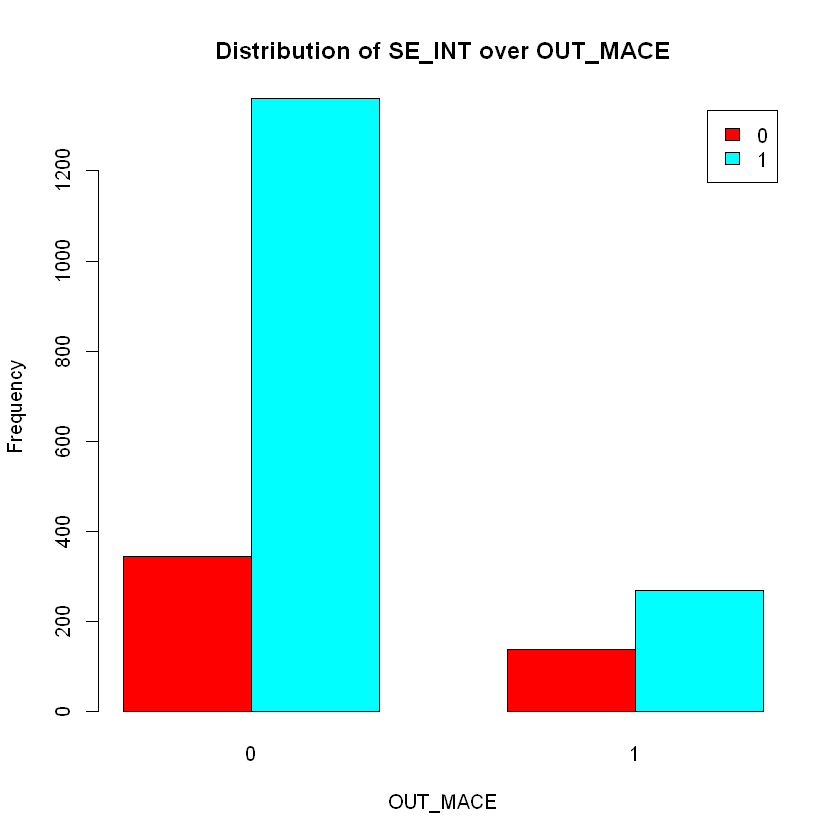

In [12]:
# Function to compare two variables with a barplot and a chi-square test
compare_variables <- function(data, variable1, variable2){
    test_result <- ci.test(variable1, variable2, data = data)
    print(test_result)
    table <- table(data[, variable1], data[, variable2])
    par(bg = "white")
    barplot(table, beside = TRUE, legend = TRUE, col = rainbow(nrow(table)), 
                    xlab = variable2, ylab = "Frequency", main = paste("Distribution of", variable1, "over", variable2))
}

compare_variables(data, "SE_INT", "OUT_MACE")

Exact conditional probabilities of OUT_MACE = 1:
$`OUT_MACE|SE_INT=1`
       1 
0.164621 

$`OUT_MACE|SE_INT=0`
      1 
0.28564 

$`OUT_MACE|SE_STU=1`
        1 
0.2048291 

$`OUT_MACE|SE_OCC=1`
        1 
0.2014116 

$`OUT_MACE|SE_CCH=1`
        1 
0.1874391 

$`OUT_MACE|SE_INT=1,SE_STU=1`
       1 
0.164621 

$`OUT_MACE|SE_INT=0,SE_OCC=1`
      1 
0.28564 

$`OUT_MACE|SE_INT=1,SE_OCC=1`
       1 
0.164621 

$`OUT_MACE|SE_CCH=1,SE_STU=1`
        1 
0.1995791 

$`OUT_MACE|SE_OCC=1,SE_STU=1`
        1 
0.2122756 



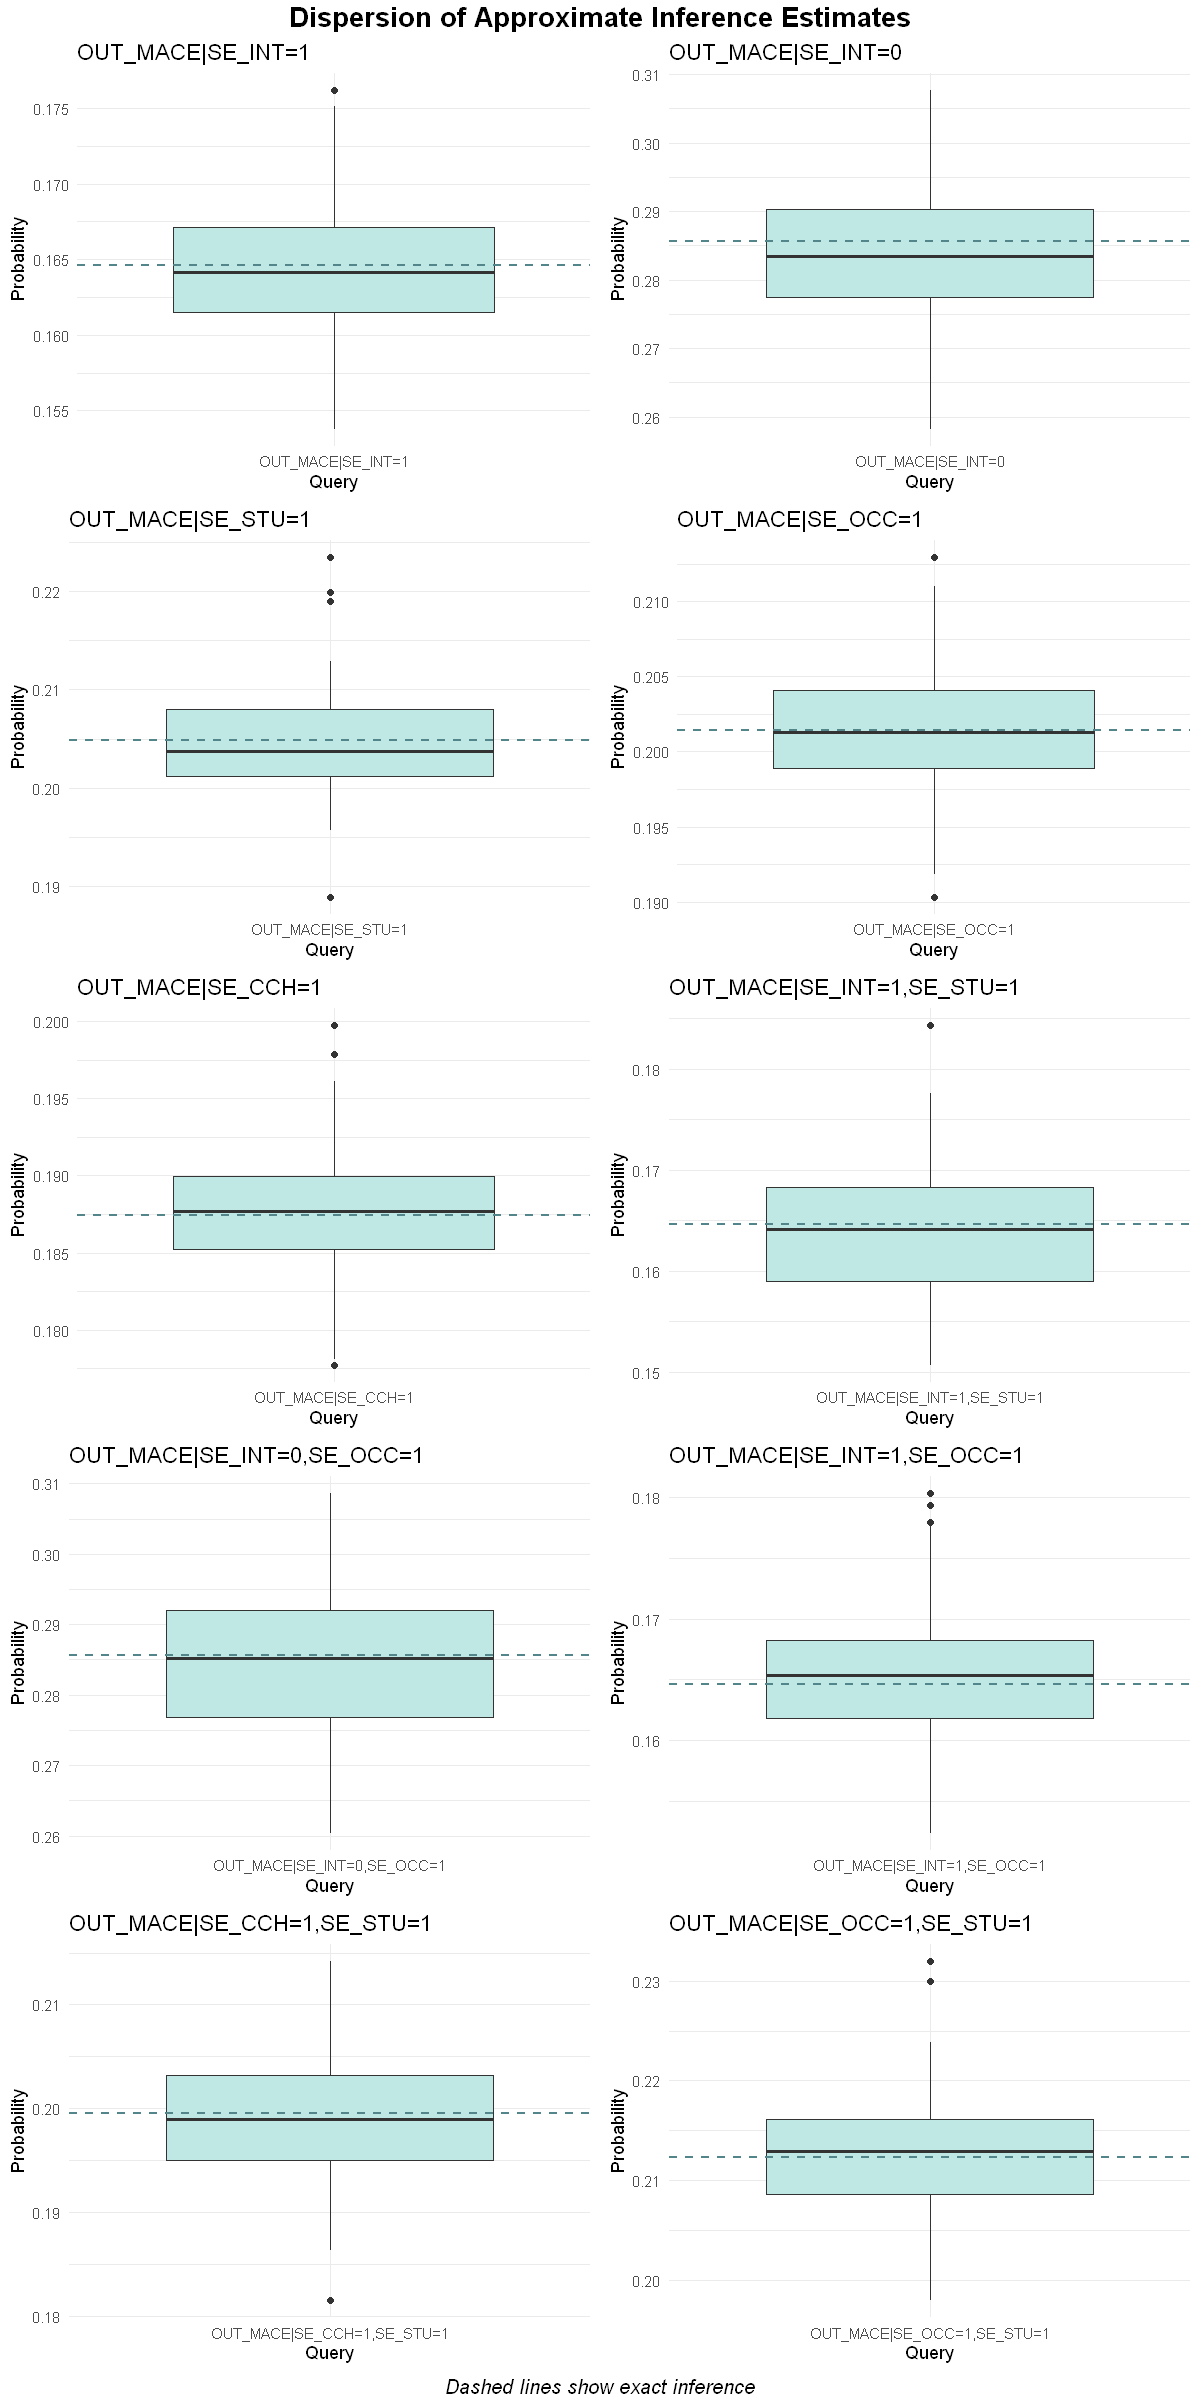

In [13]:
# Store exact probabilities for each query in a named list
exact_probs <- list(
    "OUT_MACE|SE_INT=1" = querygrain(bn_final$junction, nodes = "OUT_MACE", evidence = list(SE_INT = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_INT=0" = querygrain(bn_final$junction, nodes = "OUT_MACE", evidence = list(SE_INT = "0"))$OUT_MACE["1"],
    "OUT_MACE|SE_STU=1" = querygrain(bn_final$junction, nodes = "OUT_MACE", evidence = list(SE_STU = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_OCC=1" = querygrain(bn_final$junction, nodes = "OUT_MACE", evidence = list(SE_OCC = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_CCH=1" = querygrain(bn_final$junction, nodes = "OUT_MACE", evidence = list(SE_CCH = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_INT=1,SE_STU=1" = querygrain(bn_final$junction, nodes = "OUT_MACE", evidence = list(SE_INT = "1", SE_STU = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_INT=0,SE_OCC=1" = querygrain(bn_final$junction, nodes = "OUT_MACE", evidence = list(SE_INT = "0", SE_OCC = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_INT=1,SE_OCC=1" = querygrain(bn_final$junction, nodes = "OUT_MACE", evidence = list(SE_INT = "1", SE_OCC = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_CCH=1,SE_STU=1" = querygrain(bn_final$junction, nodes = "OUT_MACE", evidence = list(SE_CCH = "1", SE_STU = "1"))$OUT_MACE["1"],
    "OUT_MACE|SE_OCC=1,SE_STU=1" = querygrain(bn_final$junction, nodes = "OUT_MACE", evidence = list(SE_OCC = "1", SE_STU = "1"))$OUT_MACE["1"]
)

# Print all exact probabilities in a compact way
cat("Exact conditional probabilities of OUT_MACE = 1:\n")
print(exact_probs)

# Approximate inference using cpquery
set.seed(0)
approx_outmace_seint1 <- replicate(100, cpquery(bn_final$bn_fitted, event = (OUT_MACE == "1"), evidence = (SE_INT == "1")))
approx_outmace_seint0 <- replicate(100, cpquery(bn_final$bn_fitted, event = (OUT_MACE == "1"), evidence = (SE_INT == "0")))
approx_outmace_sestu1 <- replicate(100, cpquery(bn_final$bn_fitted, event = (OUT_MACE == "1"), evidence = (SE_STU == "1")))
approx_outmace_seocc1 <- replicate(100, cpquery(bn_final$bn_fitted, event = (OUT_MACE == "1"), evidence = (SE_OCC == "1")))
approx_outmace_secch1 <- replicate(100, cpquery(bn_final$bn_fitted, event = (OUT_MACE == "1"), evidence = (SE_CCH == "1")))
approx_outmace_seint1_sestu1 <- replicate(100, cpquery(bn_final$bn_fitted, event = (OUT_MACE == "1"), evidence = ((SE_INT == "1") & (SE_STU == "1"))))
approx_outmace_seint0_seocc1 <- replicate(100, cpquery(bn_final$bn_fitted, event = (OUT_MACE == "1"), evidence = ((SE_INT == "0") & (SE_OCC == "1"))))
approx_outmace_seint1_seocc1 <- replicate(100, cpquery(bn_final$bn_fitted, event = (OUT_MACE == "1"), evidence = ((SE_INT == "1") & (SE_OCC == "1"))))
approx_outmace_secch1_sestu1 <- replicate(100, cpquery(bn_final$bn_fitted, event = (OUT_MACE == "1"), evidence = ((SE_CCH == "1") & (SE_STU == "1"))))
approx_outmace_seocc1_sestu1 <- replicate(100, cpquery(bn_final$bn_fitted, event = (OUT_MACE == "1"), evidence = ((SE_OCC == "1") & (SE_STU == "1"))))

# Combine results into a data frame for visualization
approx_results <- data.frame(
    Variable = rep(c(
        "OUT_MACE|SE_INT=1",
        "OUT_MACE|SE_INT=0",
        "OUT_MACE|SE_STU=1",
        "OUT_MACE|SE_OCC=1",
        "OUT_MACE|SE_CCH=1",
        "OUT_MACE|SE_INT=1,SE_STU=1",
        "OUT_MACE|SE_INT=0,SE_OCC=1",
        "OUT_MACE|SE_INT=1,SE_OCC=1",
        "OUT_MACE|SE_CCH=1,SE_STU=1",
        "OUT_MACE|SE_OCC=1,SE_STU=1"
    ), each = 100),
    Probability = c(
        approx_outmace_seint1,
        approx_outmace_seint0,
        approx_outmace_sestu1,
        approx_outmace_seocc1,
        approx_outmace_secch1,
        approx_outmace_seint1_sestu1,
        approx_outmace_seint0_seocc1,
        approx_outmace_seint1_seocc1,
        approx_outmace_secch1_sestu1,
        approx_outmace_seocc1_sestu1
    )
)

options(repr.plot.width = 10, repr.plot.height = 20)

# Create boxplots for each query, add exact inference line
plots <- lapply(unique(approx_results$Variable), function(var) {
    ggplot(subset(approx_results, Variable == var), aes(x = Variable, y = Probability)) +
        geom_boxplot(fill = "#BFE8E4") +
        geom_hline(yintercept = exact_probs[[var]], linetype = "dashed", color = "#53868B", lwd = 0.75) +
        labs(x = "Query", y = "Probability", title = var) +
        theme_minimal()
})

# Arrange plots in a grid with bold and centered title
grid.arrange(
    grobs = plots,
    ncol = 2,
    top = textGrob("Dispersion of Approximate Inference Estimates", gp = gpar(fontsize = 16, fontface = "bold"), just = "center", hjust = 0.5),
    bottom = textGrob("Dashed lines show exact inference", gp = gpar(fontsize = 12, fontface = "italic"))
)


In [14]:
options(repr.plot.width = NULL, repr.plot.height = NULL)

## Bayesian Networks per Cluster

In [15]:
# Load the dataset
dfC <- read.csv('FINAL_DATASET_CLUSTERED.csv')

# Select the socioeconomic variables, the outcome variable and the and convert them to factors
dataC <- dfC %>% select(c(starts_with("SE_"), OUT_MACE, cluster_kmodes)) %>% mutate(across(everything(), as.factor))

data1 <- dataC %>% filter(cluster_kmodes == "1") %>% select(-c(SE_INT, SE_HI, SE_STU, cluster_kmodes))
data2 <- dataC %>% filter(cluster_kmodes == "2") %>% select(-c(SE_INT, SE_HI, SE_STU, cluster_kmodes))
data3 <- dataC %>% filter(cluster_kmodes == "3") %>% select(-c(SE_INT, SE_HI, SE_STU, cluster_kmodes))

BIC score of the DAG learned with hill-climbing (Cluster 1): -5728.561 
BIC score of the DAG learned with hill-climbing (Cluster 2): -5515.852 
BIC score of the DAG learned with hill-climbing (Cluster 3): -3295.317 


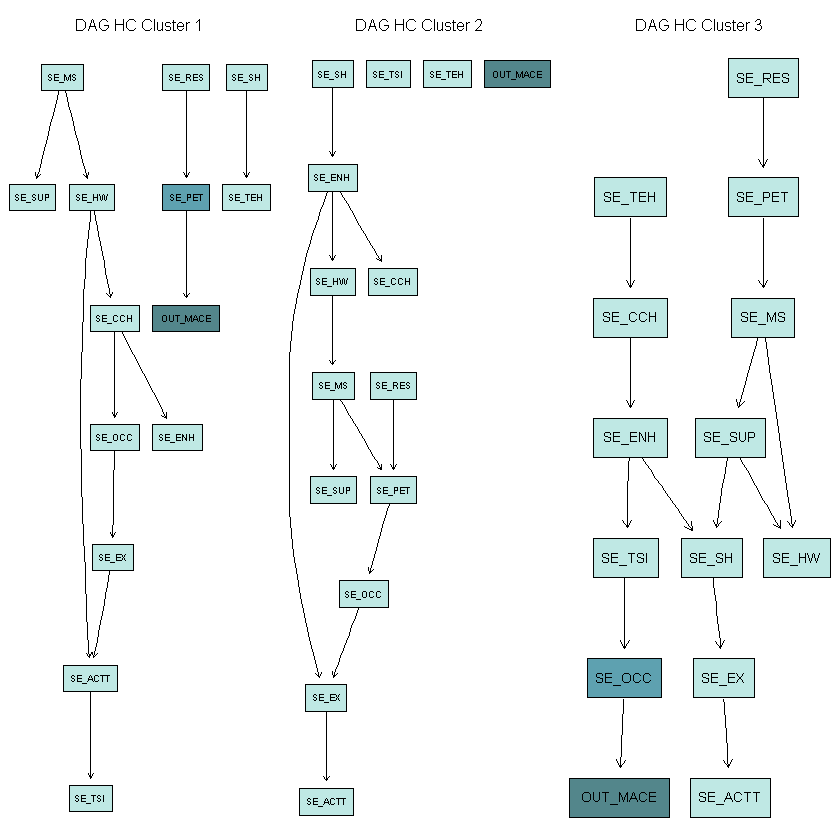

In [16]:
# Learn the DAG using the hill-climbing algorithm for each cluster
dag_hc1 <- hc(data1, score = "bic")
score_hc1 <- score(dag_hc1, data = data1, type = "bic")

dag_hc2 <- hc(data2, score = "bic")
score_hc2 <- score(dag_hc2, data = data2, type = "bic")

dag_hc3 <- hc(data3, score = "bic")
score_hc3 <- score(dag_hc3, data = data3, type = "bic")

cat("BIC score of the DAG learned with hill-climbing (Cluster 1):", score_hc1, "\n")
cat("BIC score of the DAG learned with hill-climbing (Cluster 2):", score_hc2, "\n")
cat("BIC score of the DAG learned with hill-climbing (Cluster 3):", score_hc3, "\n")

# Plot the three DAGs for comparison
mb_hc1 <- mb(dag_hc1, "OUT_MACE")
mb_hc2 <- mb(dag_hc2, "OUT_MACE")
mb_hc3 <- mb(dag_hc3, "OUT_MACE")

get_node_colors <- function(dag, mb_nodes) {
    colors <- rep("#BFE8E4", length(nodes(dag)))
    names(colors) <- nodes(dag)
    colors["OUT_MACE"] <- "#53868B"
    colors[mb_nodes] <- "#5EA1B0"
    return(colors)
}

node_colors_hc1 <- get_node_colors(dag_hc1, mb_hc1)
node_colors_hc2 <- get_node_colors(dag_hc2, mb_hc2)
node_colors_hc3 <- get_node_colors(dag_hc3, mb_hc3)

par(mfrow = c(1, 3), bg = "white")
g_hc1 <- graphviz.plot(dag_hc1, main = "DAG HC Cluster 1", render = FALSE)
graph::nodeRenderInfo(g_hc1)$fill <- node_colors_hc1
Rgraphviz::renderGraph(g_hc1)

g_hc2 <- graphviz.plot(dag_hc2, main = "DAG HC Cluster 2", render = FALSE)
graph::nodeRenderInfo(g_hc2)$fill <- node_colors_hc2
Rgraphviz::renderGraph(g_hc2)

g_hc3 <- graphviz.plot(dag_hc3, main = "DAG HC Cluster 3", render = FALSE)
graph::nodeRenderInfo(g_hc3)$fill <- node_colors_hc3
Rgraphviz::renderGraph(g_hc3)

Frecuency of arcs in the bootstrap samples:
        from       to Freq
1      SE_MS   SE_SUP  100
2      SE_HW   SE_CCH   95
3      SE_MS    SE_HW   91
4      SE_EX  SE_ACTT   82
5      SE_SH   SE_TEH   82
6     SE_OCC    SE_EX   79
7     SE_CCH   SE_ENH   73
8     SE_CCH   SE_OCC   51
9      SE_EX   SE_TEH   51
10     SE_HW  SE_ACTT   51
11    SE_PET OUT_MACE   46
12   SE_ACTT   SE_TSI   40
13    SE_SUP    SE_HW   37
14    SE_OCC   SE_PET   36
15    SE_RES   SE_PET   36
16    SE_PET   SE_RES   35
17   SE_ACTT   SE_PET   26
18   SE_ACTT   SE_RES   26
19    SE_CCH    SE_EX   24
20     SE_MS   SE_PET   23
21     SE_HW OUT_MACE   22
22     SE_EX   SE_OCC   21
23    SE_PET   SE_TSI   21
24    SE_TEH   SE_RES   21
25    SE_TSI    SE_SH   21
26    SE_CCH    SE_SH   20
27    SE_ENH   SE_TSI   19
28    SE_OCC   SE_TSI   19
29     SE_MS    SE_EX   16
30    SE_OCC   SE_CCH   16
31    SE_RES   SE_TSI   15
32    SE_RES  SE_ACTT   14
33    SE_TEH    SE_SH   14
34    SE_ENH    SE_SH   13
35    SE_EN

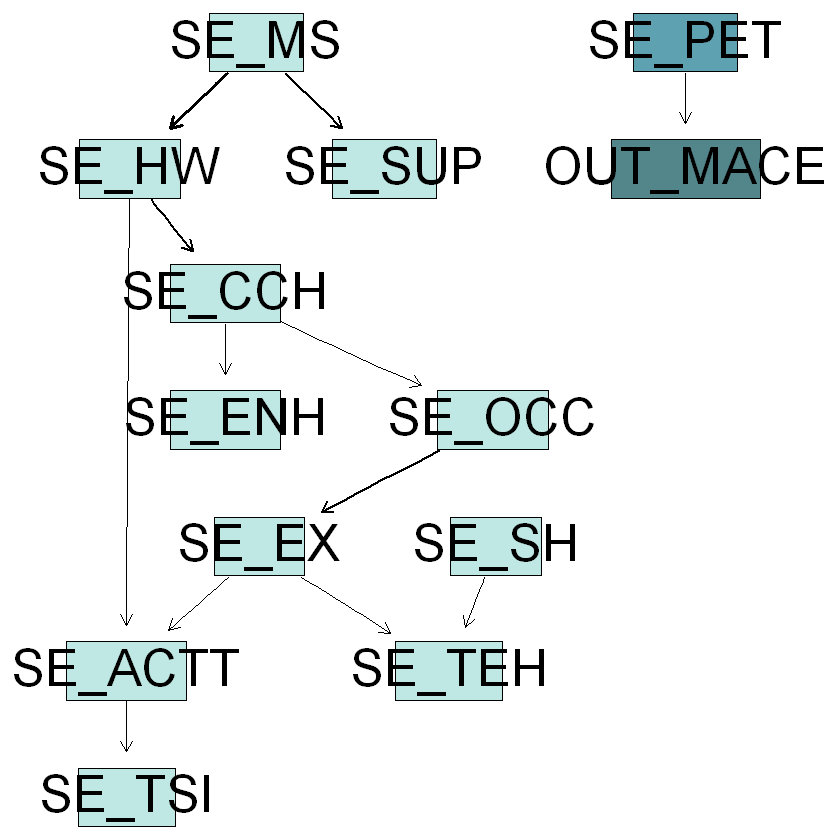

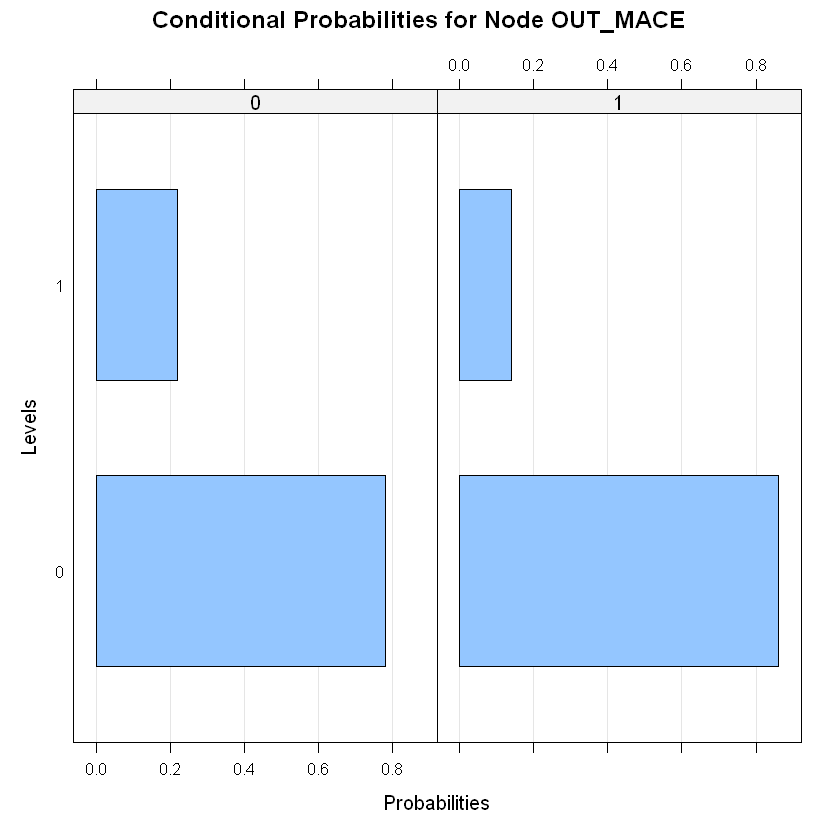

In [17]:
par(bg = "white")
bn_c1 <- perform_analysis(data1, "OUT_MACE", n_iter = 100, threshold = 40, seed = 1)

Frecuency of arcs in the bootstrap samples:
        from       to Freq
1      SE_EX  SE_ACTT  197
2      SE_MS   SE_SUP  197
3     SE_RES   SE_PET  181
4      SE_MS    SE_HW  167
5     SE_OCC    SE_EX  154
6     SE_PET   SE_OCC  140
7     SE_ENH    SE_SH  105
8     SE_ENH    SE_EX   99
9      SE_SH   SE_ENH   94
10    SE_ENH   SE_CCH   84
11     SE_MS   SE_PET   84
12    SE_ENH    SE_HW   83
13     SE_HW   SE_CCH   80
14     SE_EX   SE_ENH   64
15    SE_RES   SE_CCH   62
16     SE_MS   SE_OCC   52
17     SE_SH   SE_TEH   46
18     SE_HW  SE_ACTT   43
19    SE_RES   SE_SUP   35
20     SE_HW    SE_MS   33
21     SE_MS   SE_TSI   33
22    SE_OCC   SE_TSI   33
23     SE_EX    SE_MS   30
24    SE_PET    SE_MS   29
25    SE_OCC    SE_MS   28
26     SE_MS   SE_TEH   27
27    SE_CCH   SE_ENH   26
28   SE_ACTT   SE_CCH   25
29    SE_CCH   SE_TEH   24
30    SE_PET    SE_SH   24
31    SE_SUP   SE_ENH   24
32   SE_ACTT    SE_HW   23
33    SE_CCH   SE_RES   21
34     SE_MS    SE_EX   21
35    SE_OC

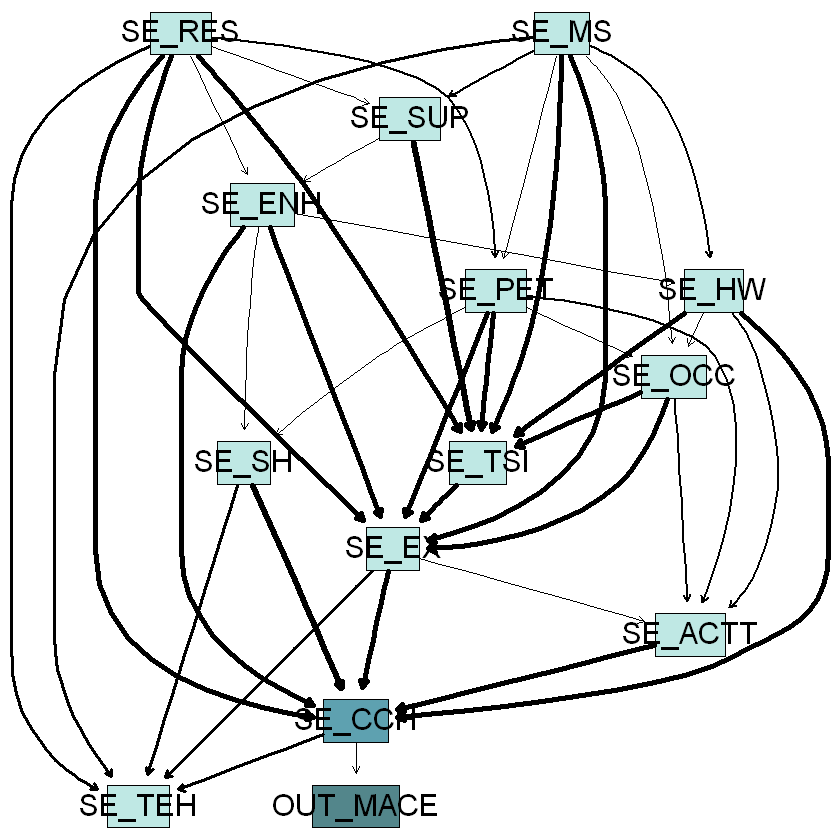

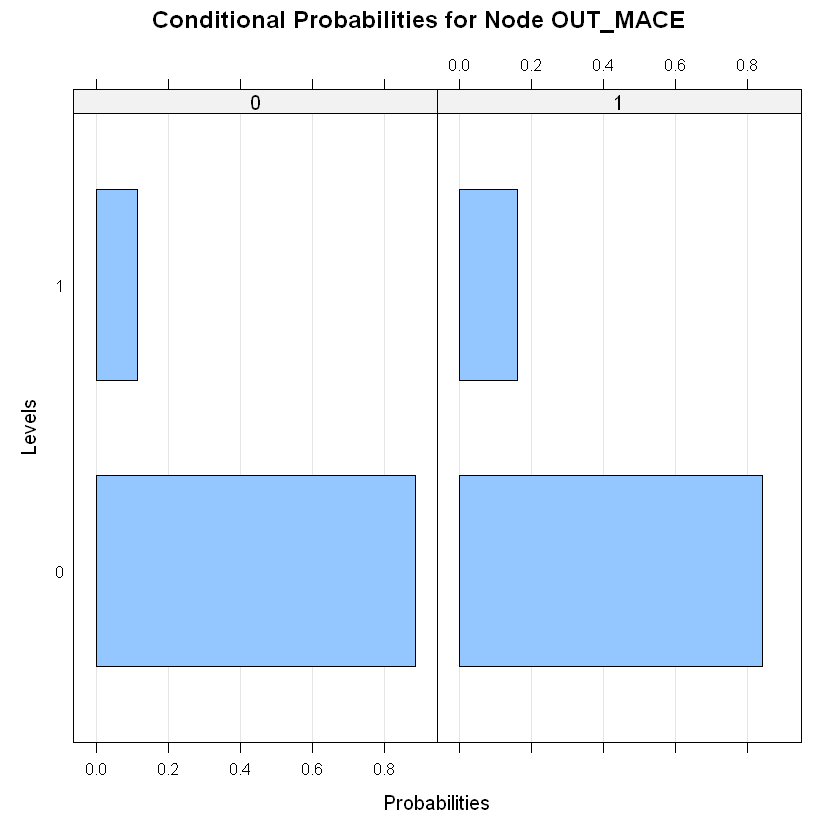

In [18]:
par(bg = "white")
bn_c2 <- perform_analysis(data2, "OUT_MACE", n_iter = 200, threshold = 10, seed = 1)

Frecuency of arcs in the bootstrap samples:
        from       to Freq
1      SE_MS   SE_SUP   98
2      SE_MS    SE_HW   97
3      SE_EX  SE_ACTT   88
4     SE_SUP    SE_SH   86
5     SE_RES   SE_PET   61
6     SE_SUP    SE_HW   59
7     SE_CCH   SE_ENH   48
8     SE_ENH    SE_SH   45
9     SE_PET   SE_OCC   39
10     SE_HW  SE_ACTT   38
11    SE_OCC OUT_MACE   37
12    SE_PET    SE_MS   37
13    SE_PET   SE_RES   36
14    SE_OCC   SE_TSI   33
15     SE_MS   SE_PET   32
16     SE_SH    SE_EX   32
17    SE_ENH    SE_EX   31
18     SE_HW OUT_MACE   27
19    SE_ENH   SE_CCH   26
20    SE_ENH   SE_TSI   25
21     SE_EX   SE_TEH   25
22    SE_TEH   SE_CCH   25
23     SE_SH   SE_ENH   24
24     SE_SH   SE_TEH   24
25     SE_EX    SE_SH   20
26    SE_CCH   SE_TEH   19
27    SE_CCH   SE_TSI   18
28     SE_SH   SE_CCH   17
29     SE_EX   SE_ENH   16
30     SE_HW    SE_EX   16
31     SE_EX   SE_OCC   13
32   SE_ACTT    SE_EX   12
33    SE_CCH  SE_ACTT   12
34    SE_RES   SE_TEH   12
35    SE_EN

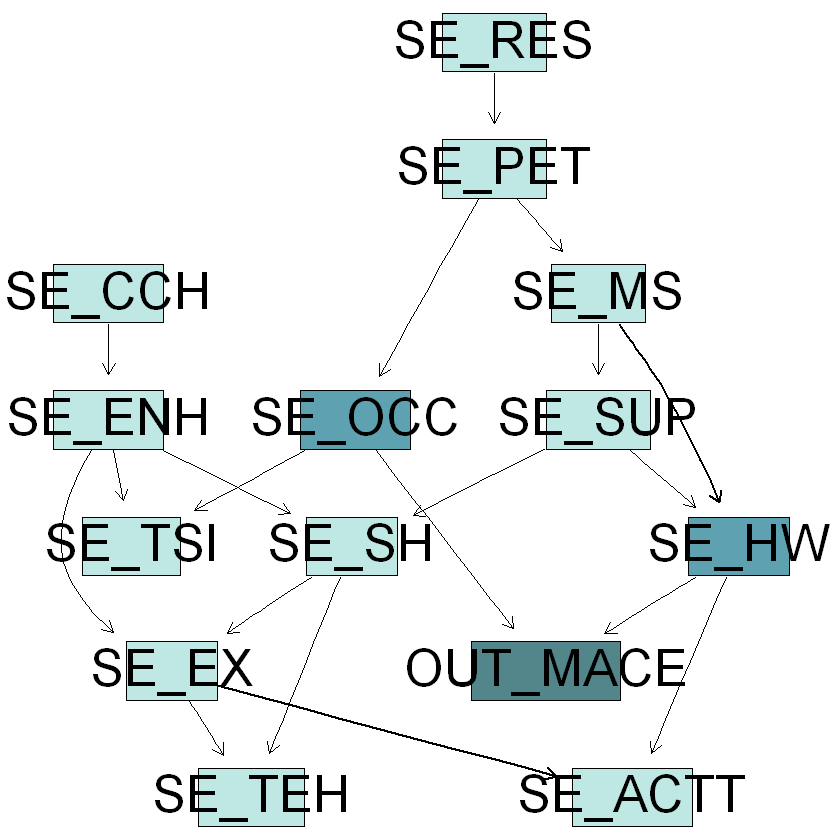

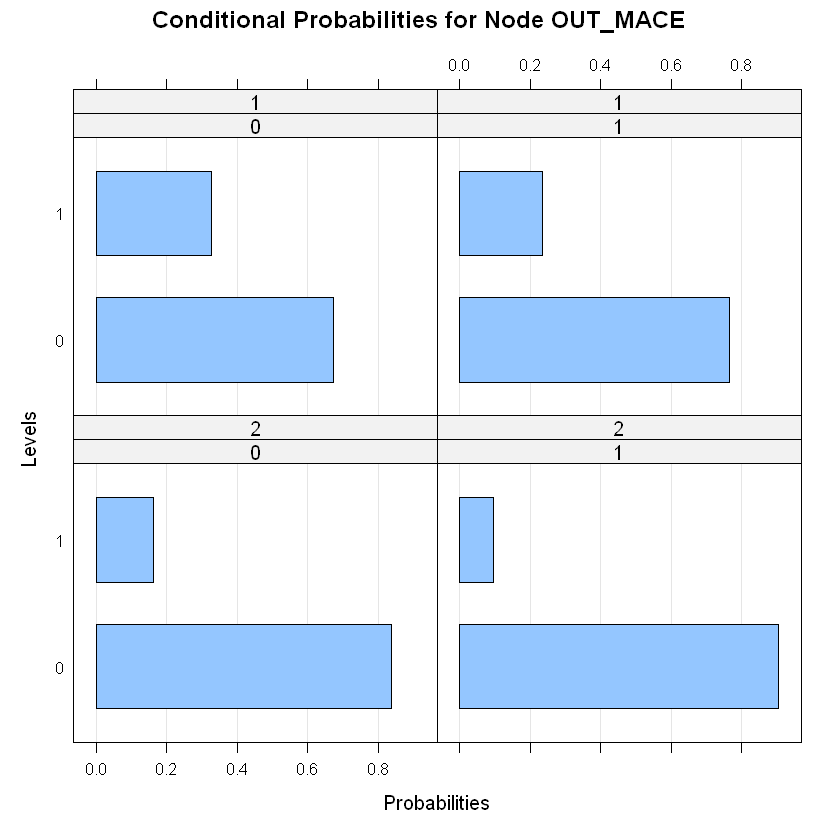

In [19]:
par(bg = "white")
bn_c3 <- perform_analysis(data3, "OUT_MACE", n_iter = 100, threshold = 20, seed = 1)